In [1]:
import pandas as pd

In [49]:
columns_df = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation",\
            "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country",\
            "_class"
        ]
        
df = pd.read_csv('Adult.data', skipinitialspace = True, delimiter = ',', names=columns_df)

df["age"] = pd.to_numeric(df["age"], errors='coerce')
df["fnlwgt"] = pd.to_numeric(df["fnlwgt"], errors='coerce')
df["education_num"] = pd.to_numeric(df["education_num"], errors='coerce')
df["capital_gain"] = pd.to_numeric(df["capital_gain"], errors='coerce')
df["capital_loss"] = pd.to_numeric(df["capital_loss"], errors='coerce')
df["hours_per_week"] = pd.to_numeric(df["hours_per_week"], errors='coerce')

In [12]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,_class
0,39.0,State-gov,77516.0,State-gov,13,State-gov,State-gov,State-gov,State-gov,State-gov,2174.0,0,40,State-gov,<=50K
1,50.0,Self-emp-not-inc,83311.0,Self-emp-not-inc,13,Self-emp-not-inc,Self-emp-not-inc,Self-emp-not-inc,Self-emp-not-inc,Self-emp-not-inc,0.0,0,13,Self-emp-not-inc,<=50K
2,38.0,Private,215646.0,Private,9,Private,Private,Private,Private,Private,0.0,0,40,Private,<=50K
3,53.0,Private,234721.0,Private,7,Private,Private,Private,Private,Private,0.0,0,40,Private,<=50K
4,28.0,Private,338409.0,Private,13,Private,Private,Private,Private,Private,0.0,0,40,Private,<=50K



                                                                  ***DISCLAIMER***

---
  * Num cenário no mundo real em que é exigida conversão de dados correta de todas as labels do dataframe, na minha experiência isso passa por decisão de time + gerencia pra entender a melhor forma de tratar cada coluna.

  * Como nesse teste o foco não é na análise exploratória, farei algumas conversões covenientes para entender visualizar os dados.

In [18]:
df.shape

(32561, 15)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32559 non-null  float64 
 1   workclass       32561 non-null  category
 2   fnlwgt          32560 non-null  float64 
 3   education       32561 non-null  category
 4   education_num   32561 non-null  int64   
 5   marital_status  32561 non-null  category
 6   occupation      32561 non-null  category
 7   relationship    32561 non-null  category
 8   race            32561 non-null  category
 9   sex             32561 non-null  category
 10  capital_gain    32560 non-null  float64 
 11  capital_loss    32561 non-null  int64   
 12  hours_per_week  32561 non-null  int64   
 13  native_country  32561 non-null  category
 14  _class          32561 non-null  object  
dtypes: category(8), float64(3), int64(3), object(1)
memory usage: 2.0+ MB


In [14]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32559.000000,3.256000e+04,32561.000000,32560.000000,32561.000000,32561.000000
mean,38.581283,1.897818e+05,10.080679,1077.681941,87.303830,40.437456
std,13.640772,1.055498e+05,2.572720,7385.403083,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


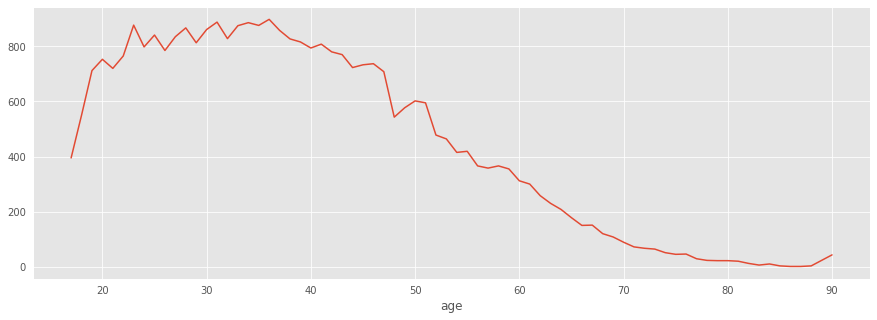

In [54]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

df.groupby(['age'])['_class'].count().plot(figsize=(15,5),)

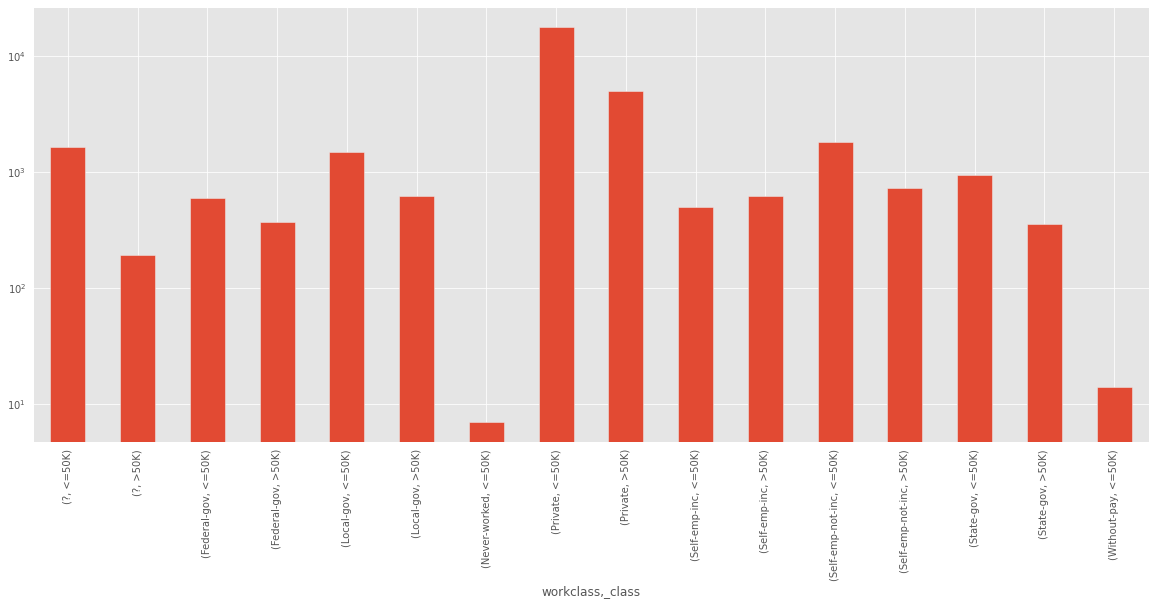

In [77]:
df.groupby(['workclass', '_class'])['_class'].count().plot(kind='bar',figsize=(20,8),logy=True)

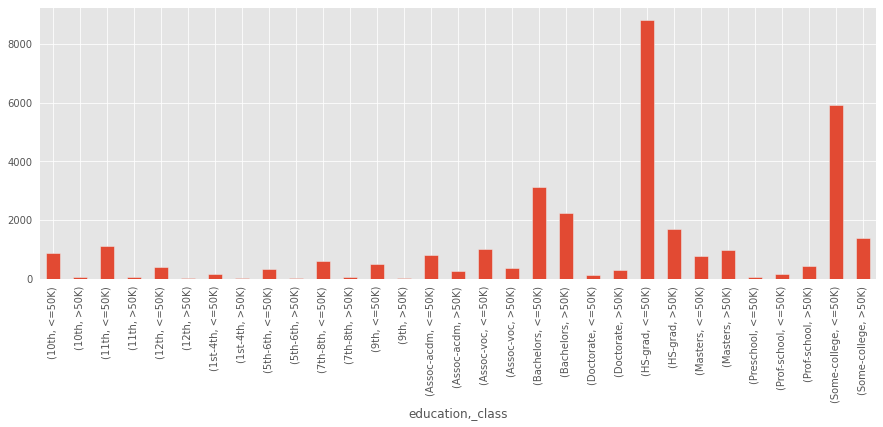

In [83]:
df.groupby(['education', '_class'])['education'].count().plot(kind='bar',figsize=(15,5))

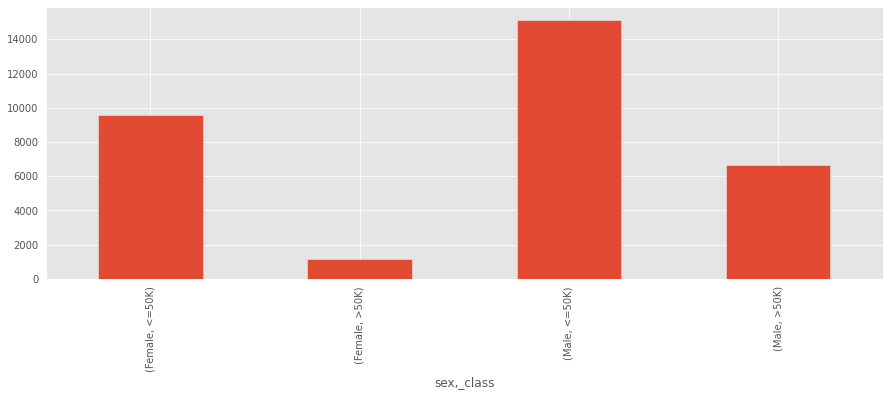

In [81]:
df.groupby(['sex', '_class'])['sex'].count().plot(kind='bar',figsize=(15,5))

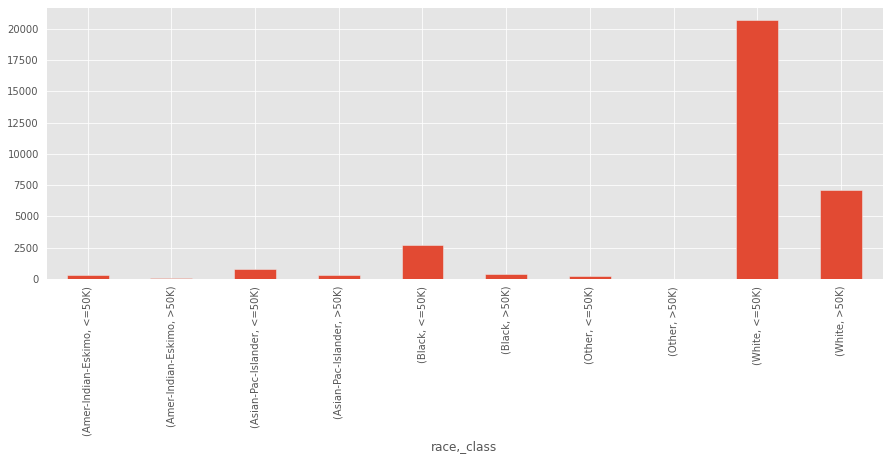

In [82]:
df.groupby(['race', '_class'])['race'].count().plot(kind='bar',figsize=(15,5))

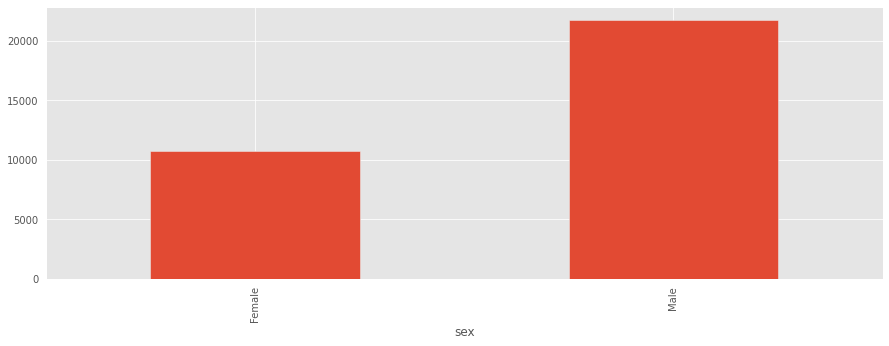

In [89]:
df.groupby('sex')['capital_gain'].count().plot(kind='bar',figsize=(15,5))

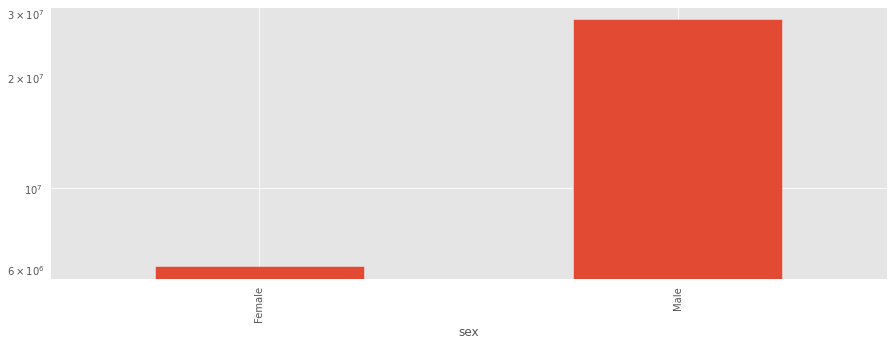

In [91]:
df.groupby('sex')['capital_gain'].sum().plot(kind='bar',figsize=(15,5), logy=True)

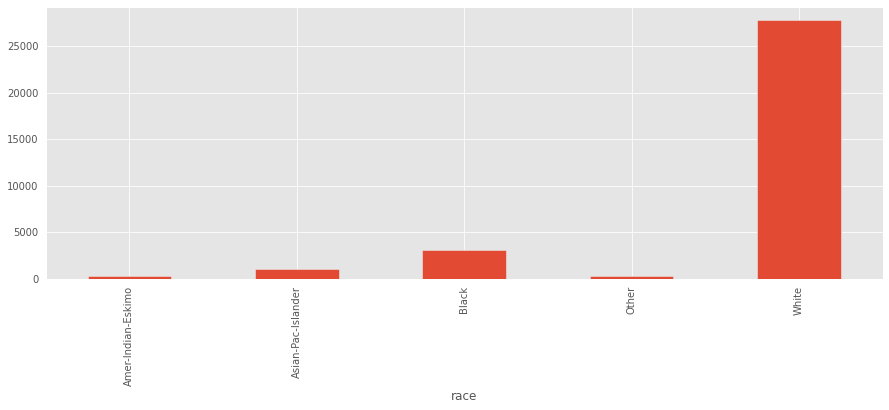

In [86]:
df.groupby('race')['capital_gain'].count().plot(kind='bar',figsize=(15,5))

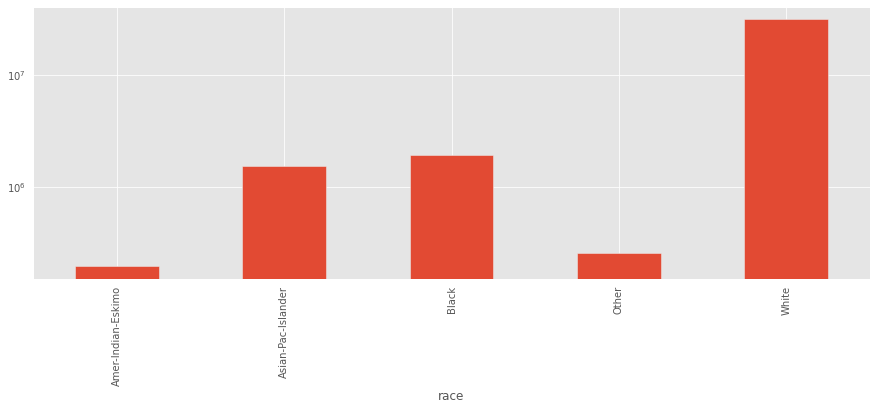

In [92]:
df.groupby('race')['capital_gain'].sum().plot(kind='bar',figsize=(15,5), logy=True)

Text(0.5, 0, 'Idade')

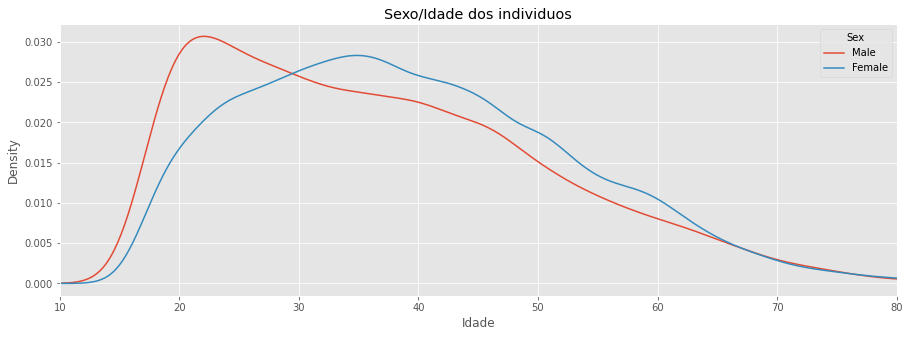

In [6]:


#plot distribution of points by team 
df.groupby('sex')['age'].plot(title="Sexo/Idade dos individuos",kind='kde', 
                              xlim=(10,80),figsize=(15,5), xticks=[10,20,30,40,50,60,70,80],
                              xlabel="Idade", grid=True)

#add legend
plt.legend(['Male', 'Female'], title='Sex')

#add x-axis label
plt.xlabel('Idade')

Text(0.5, 0, 'Idade')

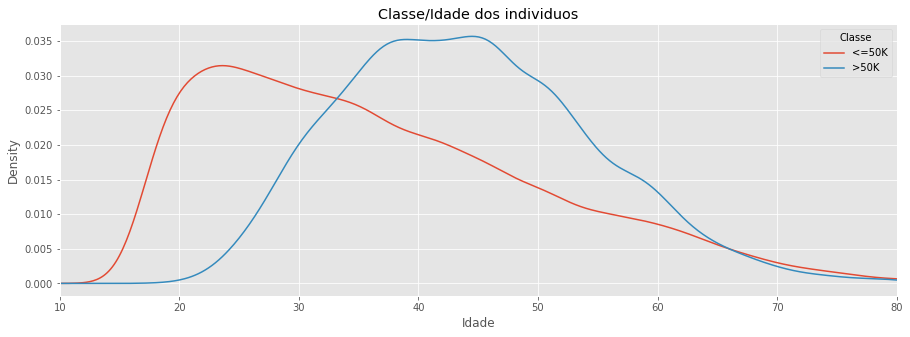

In [8]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

#plot distribution of points by team 
df.groupby('_class')['age'].plot(title="Classe/Idade dos individuos",kind='kde', 
                              xlim=(10,80),figsize=(15,5), xticks=[10,20,30,40,50,60,70,80],
                              xlabel="Idade", grid=True)

#add legend
plt.legend(['<=50K', '>50K'], title='Classe')

#add x-axis label
plt.xlabel('Idade')

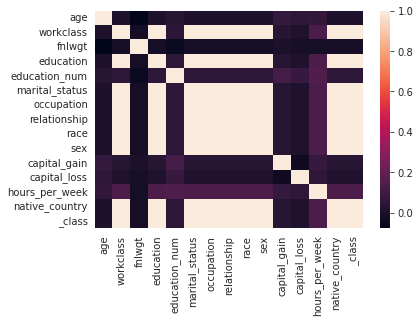

In [41]:
import seaborn as sns
# plot heatmap
ax = sns.heatmap(df.corr())

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

# save figure
plt.show()